In [46]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baseline Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Random Forest Imports
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Imports
from sklearn.tree import DecisionTreeRegressor

# K-fold Validation Imports
from sklearn.model_selection import KFold, cross_val_score

In [47]:
data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop'])


columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 
           'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 
           'medFamInc', 'perCapInc', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'ViolentCrimesPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,agePct12t29,PctLess9thGrade,PctNotHSGrad,PctBSorMore,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,perCapInc,PctSpeakEnglOnly,PctNotSpeakEnglWell,ViolentCrimesPerPop
0,21.44,5.81,9.90,48.18,11980.0,1.37,91.78,6.50,1.88,75122.0,79584.0,29711.0,85.68,1.37,41.02
1,21.30,5.61,13.72,29.89,23123.0,0.80,95.57,3.44,0.85,47917.0,55323.0,20148.0,87.79,1.81,127.56
2,25.88,2.80,9.09,30.13,29344.0,0.74,94.33,3.43,2.35,35669.0,42112.0,16946.0,93.11,1.14,218.59
3,25.20,11.05,33.68,10.81,16656.0,1.70,97.35,0.50,0.70,20580.0,26501.0,10810.0,94.98,0.56,306.64
5,32.89,8.76,23.03,20.66,140494.0,2.51,95.65,0.90,0.95,21577.0,27705.0,11878.0,96.87,0.60,442.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,30.16,17.12,30.87,15.79,56216.0,6.87,61.68,15.23,29.86,24727.0,27388.0,10237.0,65.33,11.87,545.75
2211,31.23,12.51,27.71,19.28,12251.0,21.18,76.65,1.52,1.29,20321.0,25000.0,9995.0,92.78,0.86,124.10
2212,20.96,7.82,26.14,12.42,32824.0,0.52,92.62,0.98,11.00,27182.0,34973.0,14131.0,88.95,1.70,353.83
2213,30.01,24.37,39.63,12.40,13547.0,3.37,69.91,0.90,62.11,19899.0,22103.0,8100.0,48.92,6.66,691.17


## Baseline

Average ViolentCrimesPerPop: 589.078921765296
Mean Squared Error: 348041.6146645915
Root Mean Squared Error: 589.9505188272924
R-Squared Score: -7.000089035669177e-05


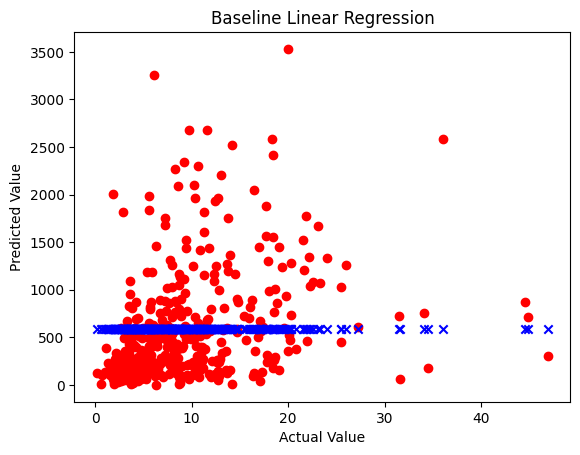

In [48]:
# Calculate Average ViolentCrimesPerPop for baseline
avgViolent = df['ViolentCrimesPerPop'].mean()
print('Average ViolentCrimesPerPop:', avgViolent)

# Add average to the dataset
df['AvgViolentCrimesPerPop'] = avgViolent

# Seperate Predictive and Target
X = df.drop(columns=['ViolentCrimesPerPop', 'AvgViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
baseline = LinearRegression().fit(X_train, y_train)
y_pred = df['AvgViolentCrimesPerPop'][:399] # Not optimal way to do this, but it works (was getting error without specific, CORRECT series length)

# Print Details
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print graph
# IMPORTANT: X-axis has wrong scale (gonna need to fix, but not currently sure how)
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('Baseline Linear Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Remove Average column from dataset to not impact future models
df = df.drop(columns=['AvgViolentCrimesPerPop'])

### Random Forest

Mean Squared Error: 144047.050445395
Root Mean Squared Error: 379.53530856218765
R-Squared Score: 0.5860922148461827


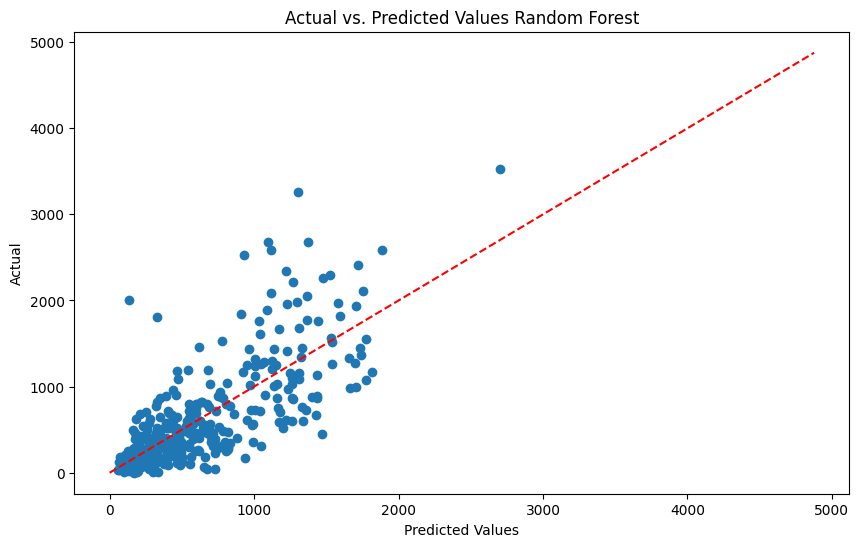

In [49]:
# Random Forest Model
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [50]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57964246 0.6694568  0.56390585 0.59513425 0.48469485 0.61646109
 0.60531126 0.63967677 0.50096279 0.50109878]
Average CV Score:  0.5756344888361722
Number of CV Scores used in Average:  10


### Decision Tree

Mean Squared Error: 296776.7999348371
Root Mean Squared Error: 544.7722459292847
R-Squared Score: 0.1472353820071366


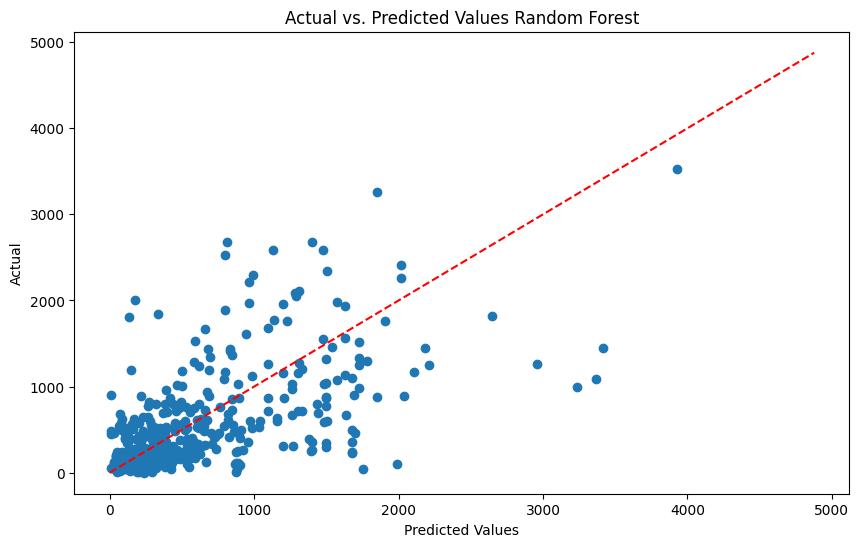

In [51]:
# Decision Tree Model
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [52]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57287282 0.66196345 0.53111932 0.58903625 0.49499707 0.61833551
 0.62834718 0.63704531 0.50077153 0.49309687]
Average CV Score:  0.5727585307705331
Number of CV Scores used in Average:  10


### Linear Regression

Mean Squared Error: 159147.6238157988
Root Mean Squared Error: 398.9331069437567
R-Squared Score: 0.5427019138370974


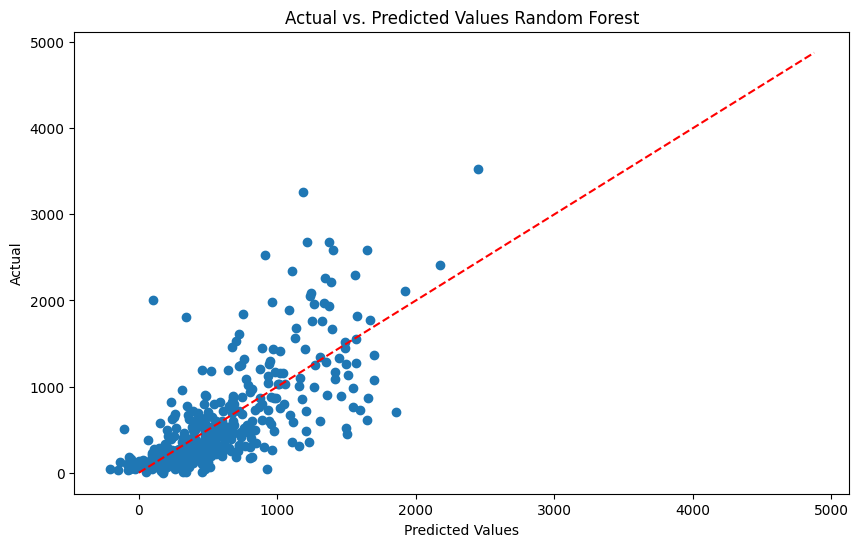

Coefficients: [ 3.42961857e-01 -5.49565014e+01  3.66068386e+01  5.27380507e+00
  2.15152278e-04  1.62727272e+01 -5.46230858e+00  5.35090049e+00
  7.06626188e+00  1.97388490e-03 -2.31407057e-02  3.40772334e-02
  4.61697467e+00  3.28007864e+01]
Intercept: 198.39988220995917


In [53]:
# Linear Regression Model
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

# Print Calculation Details
# Would like to include variable name with Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

In [54]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57428747 0.6698699  0.5769614  0.58758453 0.4952397  0.61989722
 0.62088209 0.63917762 0.51372133 0.51046575]
Average CV Score:  0.5808087011123717
Number of CV Scores used in Average:  10


## Classification

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

catData = df
catData['ViolentCrimesCat'] = pd.cut(catData['ViolentCrimesPerPop'], bins=3, labels=['low', 'medium', 'high'])
catData['ViolentCrimesCat'].value_counts()

X = catData.drop(columns=['ViolentCrimesPerPop', 'ViolentCrimesCat'])
y = catData['ViolentCrimesCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ViolentCrimesCat
low       1424
medium      93
high         8
Name: count, dtype: int64

## DT

In [56]:
# deciesion tree regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt_cart = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_cart.predict(X_test)

### Cross Validation

In [57]:
k = 5
cv_scores = cross_val_score(dt_cart, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.89473684 0.9122807  0.88972431 0.89223058 0.90452261]
Average Cross-Validation Score: 0.898699008828604


### Metrics

In [58]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_cart.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9047619047619048
Precision: 0.8937000238691968
Recall: 0.9047619047619048
F1-Score: 0.897632300295585
ROC-AUC: 0.5602595939444184


## RF

In [59]:
# random forest regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Cross Validation

In [60]:
k = 10
cv_scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.94       0.935      0.935      0.92       0.94472362 0.94472362
 0.93969849 0.93969849 0.93467337 0.93969849]
Average Cross-Validation Score: 0.9373216080402008


### Metrics

In [61]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9348370927318296
Precision: 0.9265498351476656
Recall: 0.9348370927318296
F1-Score: 0.914022965174466
ROC-AUC: 0.9276268286126944


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

### Cross Validation

In [63]:
k = 10
cv_scores = cross_val_score(nb_classifier, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.815      0.905      0.865      0.85       0.90452261 0.83417085
 0.88442211 0.87437186 0.84924623 0.82914573]
Average Cross-Validation Score: 0.8610879396984924


### Metrics

In [64]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8771929824561403
Precision: 0.9177941322232135
Recall: 0.8771929824561403
F1-Score: 0.8954772824176623
ROC-AUC: 0.9109479412904303


## Gradient Boost

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

### Cross Validation

In [66]:
k = 5
cv_scores = cross_val_score(gb_classifier, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.93483709 0.9273183  0.93483709 0.93233083 0.92211055]
Average Cross-Validation Score: 0.9302867722068993


### Metrics

In [67]:
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
recall = recall_score(y_test, y_pred_gb, average='weighted')
f1 = f1_score(y_test, y_pred_gb, average='weighted')
roc_auc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9273182957393483
Precision: 0.9219062014387959
Recall: 0.9273182957393483
F1-Score: 0.9120160227370127
ROC-AUC: 0.8869757511391531


### NOTES

- With the classification models, I binned the violent crimes column into small medium and large. Im not sure that the binning is accurate enough for the dataset and we should look to more specificaly tune bin sizes.
- I think that overall the classification models are more accurate than the regression models but that could be due to the bins. 
- Looking at the classification models Random forest performed the best with the best performance in crossvalidation and in general accuracy scores.
- the next best model seemed to be gradient boost, it performed about as well as random forest in cross validation but had slightly lower accuracy and other metrics
- Decisicion tress was the opposite with lower cross validation scores but better accuracy and precision metrics


## K-means

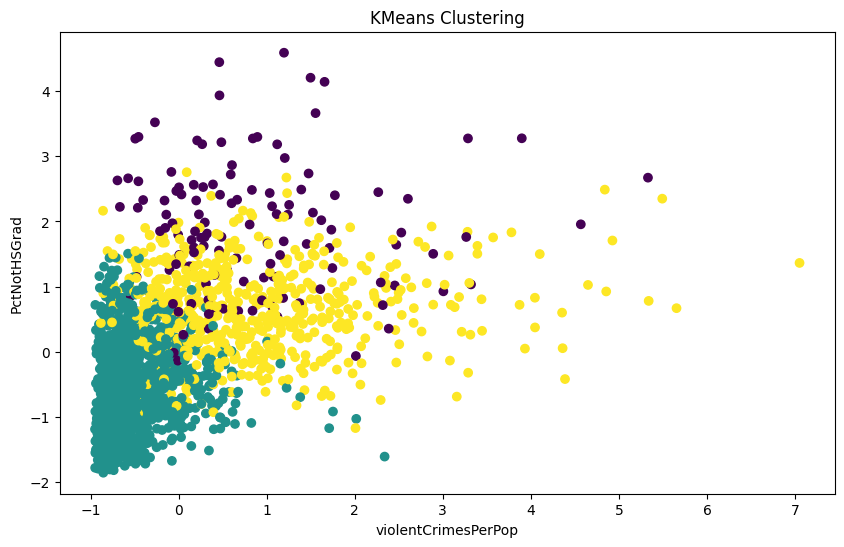

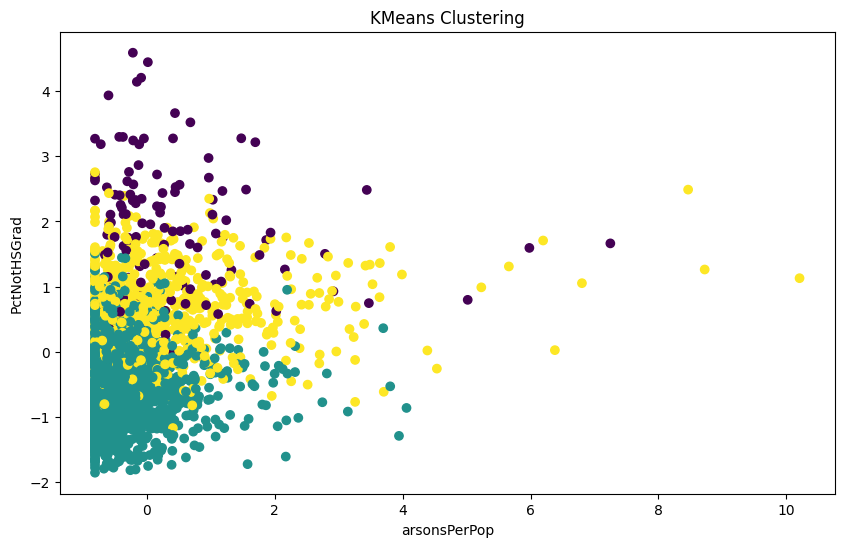

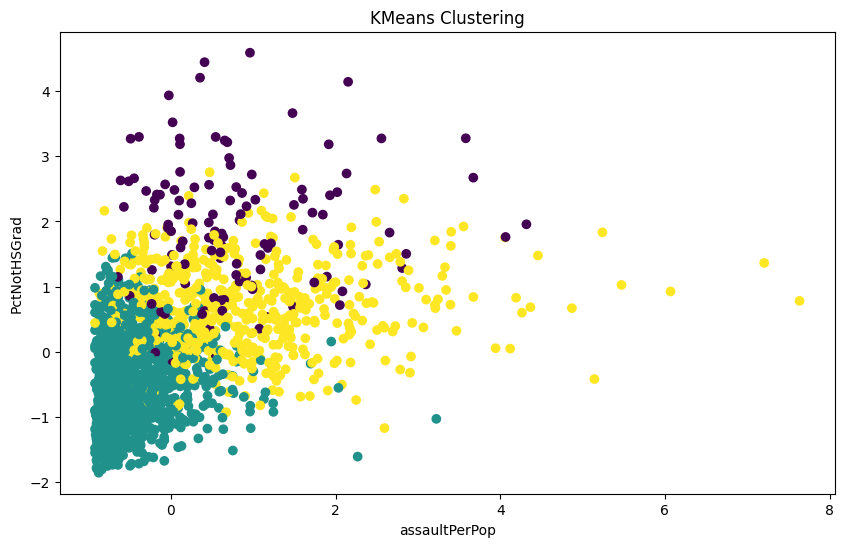

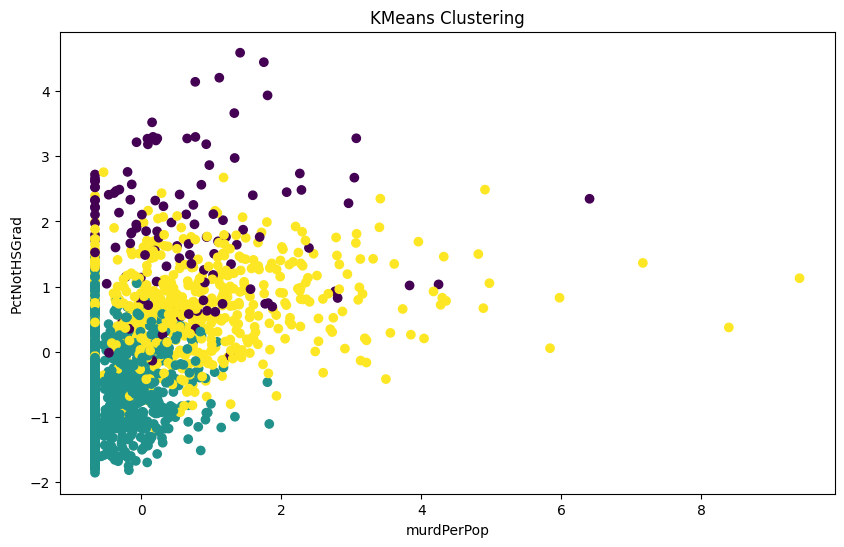

Cluster Centers:
[[3.06756452e+01 2.57783871e+01 4.35403226e+01 1.18134677e+01
  9.81389597e+04 6.42629032e+00 6.01908871e+01 6.50959677e+00
  5.64302419e+01 2.61212823e+04 2.86974597e+04 1.01722581e+04
  4.22493548e+01 1.63754839e+01 1.10022871e+03 4.87963710e+01
  6.80618387e+02 1.15803226e+01]
 [2.69704066e+01 6.26579253e+00 1.69515934e+01 2.73501826e+01
  3.13027261e+04 3.38073859e+00 9.15664481e+01 3.00141079e+00
  4.46746058e+00 3.95050697e+04 4.59230324e+04 1.78768025e+04
  8.94198091e+01 1.50787552e+00 2.77439344e+02 2.13598506e+01
  1.79247170e+02 2.01873859e+00]
 [2.82527336e+01 1.26205536e+01 3.02173183e+01 1.63433218e+01
  8.69080052e+04 2.25091176e+01 7.14381661e+01 1.64192042e+00
  7.48079585e+00 2.39601263e+04 2.91971332e+04 1.19844187e+04
  8.90812111e+01 1.96427336e+00 1.11568637e+03 5.09515571e+01
  7.20206834e+02 1.29858131e+01]]


In [68]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop'])


columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack', 
           'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly', 
           'PctNotSpeakEnglWell', 'ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

X = df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 14], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('violentCrimesPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 15], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('arsonsPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 16], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('assaultPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 17], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('murdPerPop')
plt.ylabel('PctNotHSGrad')
plt.title('KMeans Clustering')
plt.show()

print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

## Optimization of the Models

In [69]:
# data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
# data = data.replace('?', np.nan)
# data = data.dropna(subset=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop'])

# columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack',
#               'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly',
#               'PctNotSpeakEnglWell', 'ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop']
# df = data[columns].astype(float)
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# df.rename(columns = {'racepctblack':'racePctBlack'}, inplace = True)

# # make column that takes all of the race columns and states the majority race
# df['MajorityRace'] = df[['racePctBlack', 'racePctWhite', 'racePctAsian', 'racePctHisp']].idxmax(axis=1)

# df['MajorityRace'] = df['MajorityRace'].apply(lambda x: x.replace('racePct', '').lower())
# df = pd.get_dummies(df, columns=['MajorityRace'], dtype=int)

## Regression

Mean Squared Error: 170510.3132565002
Root Mean Squared Error: 412.92894456128914
R-Squared Score: 0.5751523484873188


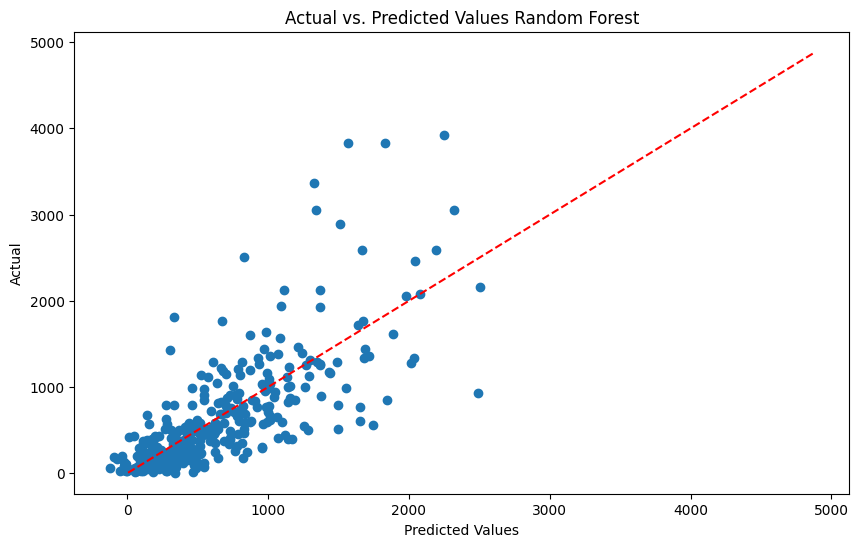

In [70]:
# Linear regression model with new columns above
# X = df.drop(columns=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop', 'racePctBlack',
#               'racePctWhite', 'racePctAsian', 'racePctHisp'])
X = df.drop(columns=['ViolentCrimesPerPop', 'arsonsPerPop', 'assaultPerPop', 'murdPerPop'])
y = df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# plots of the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

Mean Squared Error: 176647.0052180994
Root Mean Squared Error: 420.29395096539207
R-Squared Score: 0.5598620172566195


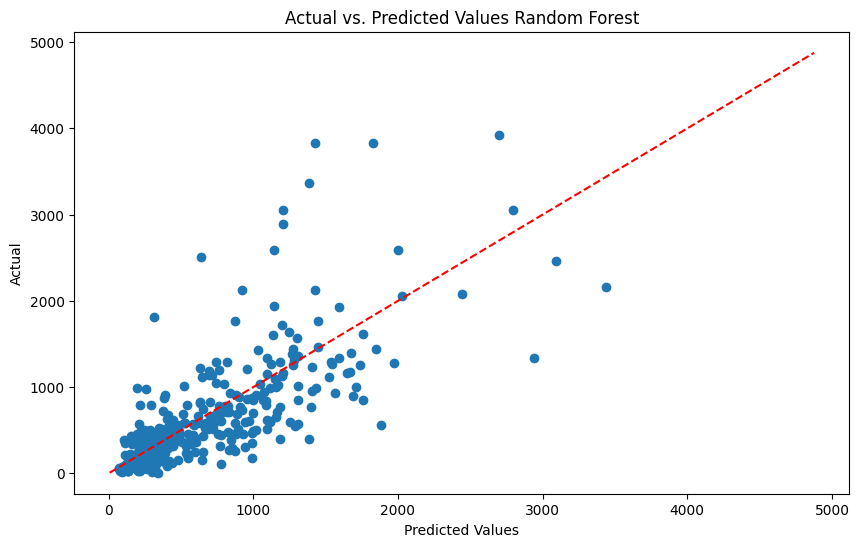

In [71]:
# random forest model with
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# plots of the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

Mean Squared Error: 419662.7232753927
Root Mean Squared Error: 647.8138029367642
R-Squared Score: -0.045641867672599146


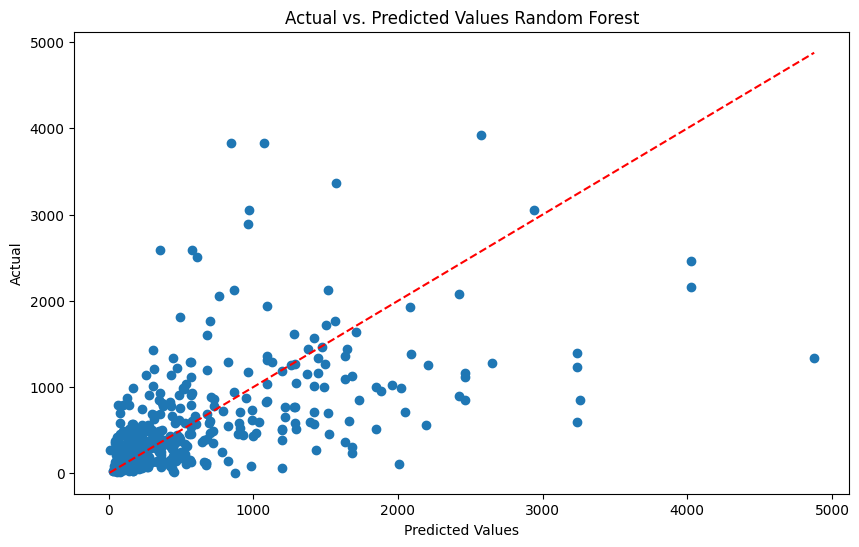

In [72]:
# decision tree model
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# plots of the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [73]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grids for each model
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'max_features': ['auto', 'sqrt', 'log2']}
lr_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
# nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Initialize models
ridge = Ridge()
lasso = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr = LinearRegression()
gb = GradientBoostingRegressor()
# nb = GaussianNB()

# Perform Grid Search for each model
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_squared_error')
# nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='neg_mean_squared_error')

# Fit models
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
# nb_grid.fit(X_train, y_train)

# Get best models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_
# best_nb = nb_grid.best_estimator_

# Evaluate models
# models = {'Ridge': best_ridge, 'Lasso': best_lasso, 'Decision Tree': best_dt, 'Random Forest': best_rf, 'Gradient Boosting': best_gb, 'Naive Bayes': best_nb}
models = {'Ridge': best_ridge, 'Lasso': best_lasso, 'Decision Tree': best_dt, 'Random Forest': best_rf, 'Gradient Boosting': best_gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, RMSE: {rmse}, R2: {r2}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.291e+06, tolerance: 4.469e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.269e+05, tolerance: 4.227e+04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

KeyboardInterrupt: 

## Classification

In [ ]:
data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop'])

columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack',
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly',
              'PctNotSpeakEnglWell', 'ViolentCrimesPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.rename(columns = {'racepctblack':'racePctBlack'}, inplace = True)

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

catData = df
# effectively binning the violent crimes per population into x bins based on the distribution
n = catData['ViolentCrimesPerPop'].quantile([0, 0.33, 0.66, 1]).values
binLabels = ['low', 'medium', 'high']

catData['ViolentCrimesCat'] = pd.cut(catData['ViolentCrimesPerPop'], bins=n, labels = binLabels)
catData['ViolentCrimesCat'].value_counts()
catData['ViolentCrimesCat'] = catData['ViolentCrimesCat'].astype(str)
X = catData.drop(columns=['ViolentCrimesPerPop', 'ViolentCrimesCat'])
y = catData['ViolentCrimesCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print bin counts
print(catData['ViolentCrimesCat'].value_counts())

ViolentCrimesCat
high      649
medium    629
low       628
nan         1
Name: count, dtype: int64


In [80]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

k = 10
cv_scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation Scores for each fold: [0.64921466 0.7591623  0.71204188 0.67539267 0.65445026 0.71727749
 0.69633508 0.68947368 0.62631579 0.63157895]
Average Cross-Validation Score: 0.6811242766602371


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

Accuracy: 0.6335078534031413
Precision: 0.6283174502139663
Recall: 0.6335078534031413
F1-Score: 0.6300887612828163


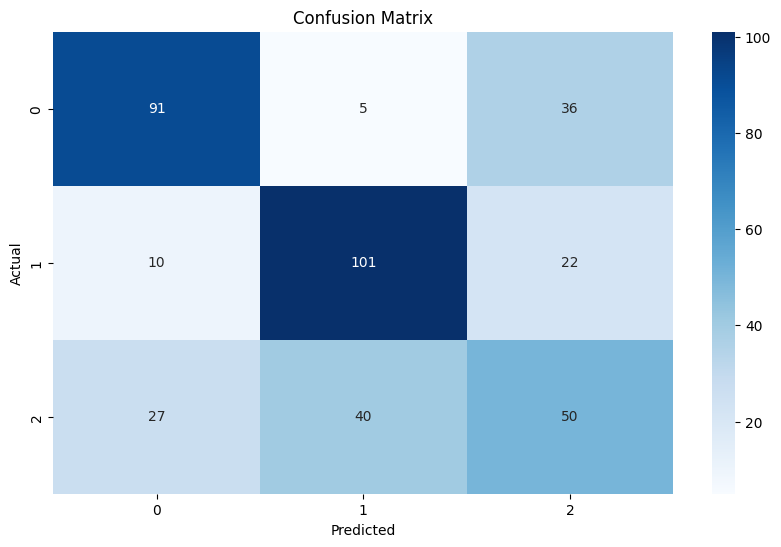

In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Plot the decision tree classification outputs, maybe a confusino matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6178010471204188
Precision: 0.6306376448726208
Recall: 0.6178010471204188
F1-Score: 0.6097479667295272


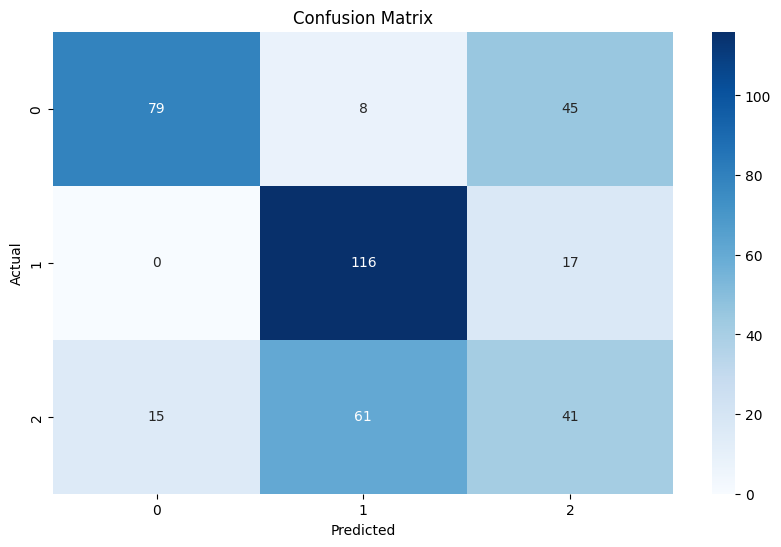

In [ ]:
# navie bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6178010471204188
Precision: 0.6306376448726208
Recall: 0.6178010471204188
F1-Score: 0.6097479667295272


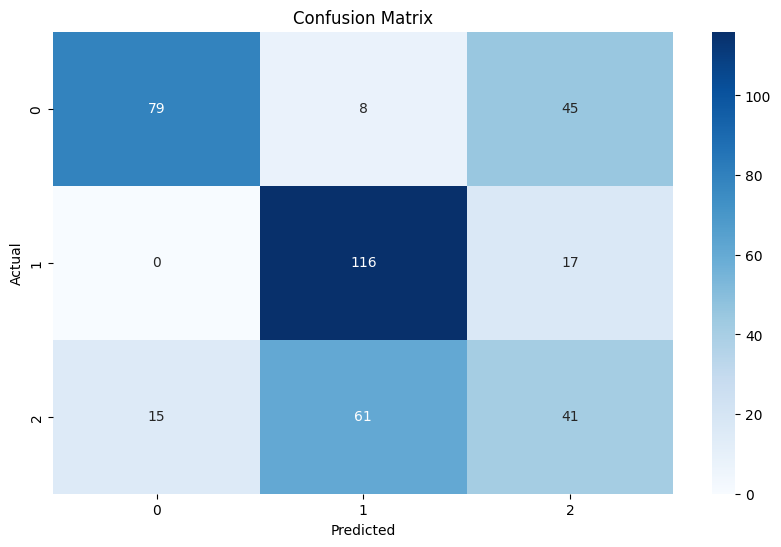

In [ ]:
# other classifiers 
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Parameter tuning

In [ ]:
# hyperparameter tuning for classification models above
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define parameter grids for each model
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'max_features': ['auto', 'sqrt', 'log2']}
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
# Initialize models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
nb = GaussianNB()

# Perform Grid Search for each model
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='accuracy')

# Fit models
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)

# Get best models
best_dt = dt_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_
best_nb = nb_grid.best_estimator_

# Evaluate models
models = {'Decision Tree': best_dt, 'Random Forest': best_rf, 'Gradient Boosting': best_gb, 'Naive Bayes': best_nb}

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most

KeyboardInterrupt: 

In [ ]:
# print models and their scores
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

Decision Tree - Accuracy: 0.6413612565445026, Precision: 0.6381641025816389, Recall: 0.6413612565445026, F1-Score: 0.6385603915216332
Random Forest - Accuracy: 0.6780104712041884, Precision: 0.6777420916010382, Recall: 0.6780104712041884, F1-Score: 0.6760106443292206
Gradient Boosting - Accuracy: 0.6858638743455497, Precision: 0.6809617529894979, Recall: 0.6858638743455497, F1-Score: 0.6792856140912154
Naive Bayes - Accuracy: 0.5968586387434555, Precision: 0.6262597006848708, Recall: 0.5968586387434555, F1-Score: 0.5815372172711043
